# Desenvolvimento do algoritmo SVM:

In [182]:
import numpy as np

class SVM:
    
    # To initialize the parameters from the SVM algorithm:
    def __init__(self, alpha_param, lambda_param, iterations):
        self.alpha_param = alpha_param
        self.lambda_param = lambda_param
        self.iteration = iterations
        self.w = None # Weights
        self.b = None # Bias term
   

    # Training the model (using Gradient Descent)
    def fit(self, X, y):
        # First we need to initialize the weights and the bias term:
        self.w = np.zeros(X.shape[1])
        self.b = 0
        # Gradient Descent:
        for _ in range(self.iterations):
            for index, x_i in enumerate(X):
                if y[index] * (np.dot(x_i, self.w) - self.b) >= 1:
                    # Derivatives:
                    dJdw = 2 * self.lambda_param * self.w
                    dJdb = 0
                else:
                    # Derivatives:
                    dJdw = 2 * self.lambda_param * self.w - np.dot(x_i, y[index])
                    dJdb = y[index]
                # Update Rule:
                w = w - self.alpha * dJdw
                b = b - self.alpha * dJdb
                
        
    # Just implements the equation: yi.(w.xi-b) >= 1
    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)
    
    # Just a simple function to adjust data in -1 and 1
    def adjust_labels(self, y):
        y = np.where(y <= 0, -1, 1)

# Gerando base de dados

In [183]:
# Imports:
from numpy import pi
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import plot_confusion_matrix

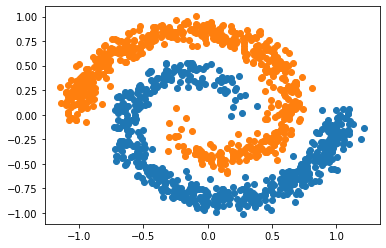

In [184]:
# Generating spiral data:
# (Code from: https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5)
N = 600
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = (data_a + np.random.randn(N,2))/15

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = (data_b + np.random.randn(N,2))/15

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("spiral_data.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

# Separando os dados em treinamento e teste

In [185]:
# Loading dataset:
df = pd.read_csv("spiral_data.csv")
df.head()


,x,y,label
0,-0.71997,0.64024,1.0
1,0.28348,0.73855,1.0
2,1.01296,-0.16360,0.0
3,-0.28866,0.79467,1.0
4,0.71302,0.12351,1.0


In [186]:
X = df[["x","y"]]
y = df["label"]

# Labels -1 and 1:
y = np.where(y <= 0, -1, 1)

# Separate data between training and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# Treinamento SVM

In [187]:
clf = svm(kernel="rbf", C=10)
clf.fit(X_train, y_train)

SVC(C=10)

# Plotando os dados no espaço de entrada resaltando os vetores de suporte

Text(0.5, 1.0, 'Dados de entrada com vetores suporte destacaos em preto.')

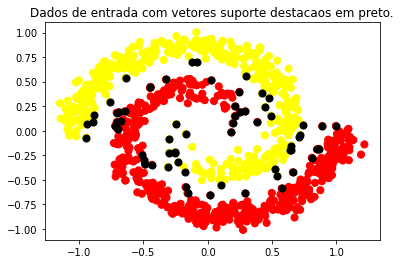

In [188]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=50, lw=1, facecolors='black');
plt.title("Dados de entrada com vetores suporte destacaos em preto.")

# Plotando os dados no espaço de entrada com o hiperplano de separação

Text(0.5, 1.0, 'Dados de entrada com hiperplano de separação.')

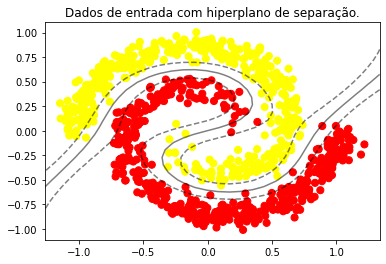

In [189]:
# Plot data into input space highlighting support vectors 
# (Code from: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
def plot_svc_decision_function(model, ax=None, plot_support=True, vectors_color="none"):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, linewidth=0.5, facecolors=vectors_color);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(model = clf);
plt.title("Dados de entrada com hiperplano de separação.")

# Plotando superfície de separação

Text(0.5, 0.92, 'Superfície de separação.')

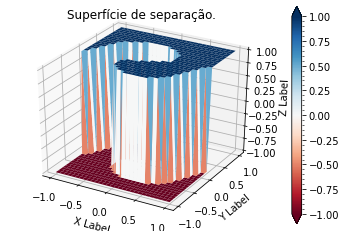

In [190]:
def plot_svc_surface(model, plot_support=True, vectors_color="none"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # create grid to evaluate model
    x = np.linspace(-1, 1, 30)
    y = np.linspace(-1, 1, 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = clf.predict(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    figure= ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='RdBu',edgecolor='none')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    cbar = fig.colorbar(figure, ax=ax, extend='both')
    cbar.minorticks_on()


plot_svc_surface(model = clf);
plt.title("Superfície de separação.")

# Aplicação do modelo aos dados de teste e cálculo da acurácia

In [191]:
y_pred = clf.predict(X_test)

In [192]:
# Print model performance
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred)))


accuracy is 0.997
roc-auc is 0.997


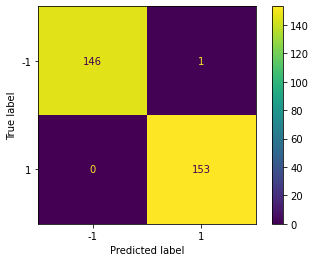

In [193]:
plot_confusion_matrix(clf, X_test, y_test)